# Imports

In [96]:
import torch
import numpy as np

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# PyTorch Basics

## Create Tensors

In [2]:
# create 1d array or simply called vector
arr = torch.arange(10)
arr

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# check the dtypes
type(arr)

torch.Tensor

In [5]:
# what is the dtype of an element of the vector we just created
type(arr[0])

torch.Tensor

In [9]:
# to access an element we have to use the `item` method
arr[0].item()

0

In [10]:
# let's check its dtype
type(arr[0].item())

int

So, by default the item is int type we don't specify the dtype during creation

In [21]:
# let's create a float dtype vector
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
# let's check the dtype of an element
type(x[0].item())

float

In [23]:
# how to check the number of elements in the vector
len(x)

12

the `len` fuction works for this

In [24]:
# there is another method available for each pytorch tensors
x.numel()

12

In [25]:
# we can also check the shape of the vector
x.shape

torch.Size([12])

In [28]:
# we can also reshape the data
x = x.reshape(3, 4)
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
x.shape

torch.Size([3, 4])

In [34]:
# we can access any element by providing its indices
x[1, 2]

tensor(6.)

In [37]:
# we don't need to provide both shape values
# pytorch can infer the shape of other axis if we put the -1
x = x.reshape(4, -1)
x

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [40]:
x.reshape(-1, 4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [41]:
# we can also create a tensor with all zeros
torch.zeros((2, 2, 3))

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [42]:
torch.zeros((2, 2, 3)).shape

torch.Size([2, 2, 3])

In [46]:
# a tensor with elements drawn from a standard normal distribution
# with mean 0 and standard deviation 1
torch.randn(3, 4)

tensor([[-0.6727, -0.7243, -0.7511, -0.4325],
        [ 2.2684,  0.0114, -0.1854,  0.3075],
        [-0.8117,  1.7215,  0.9436, -0.1494]])

In [49]:
# let's see if torch actually pulls the random numbers
# from a standard gaussian distribution
x = torch.randn(1000)
x.shape

torch.Size([1000])

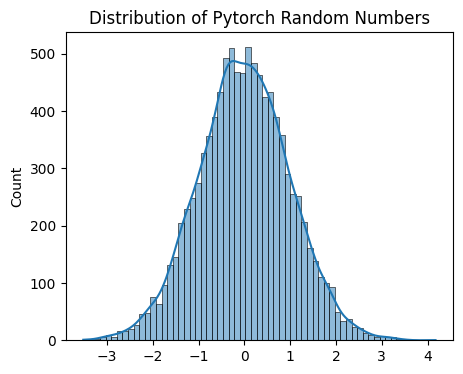

In [53]:
# get the data
n = 10000
x = torch.randn(n)

# plot the data
fig = plt.figure(figsize=(5, 4))
sns.histplot(x, kde=True)
plt.title("Distribution of Pytorch Random Numbers")
plt.show()

## Indexing and Slicing

In [58]:
# create a random 3x4 tensor
x = torch.randn((3, 4))
x

tensor([[ 0.3437, -0.7666,  1.1599, -0.3402],
        [-1.5298,  0.3527,  0.5977, -1.4388],
        [-0.0396, -1.1321,  1.1663, -1.1914]])

In [59]:
x.shape

torch.Size([3, 4])

In [60]:
# accessing a row
x[0]

tensor([ 0.3437, -0.7666,  1.1599, -0.3402])

In [61]:
# accessing last two rows
x[1:3]

tensor([[-1.5298,  0.3527,  0.5977, -1.4388],
        [-0.0396, -1.1321,  1.1663, -1.1914]])

In [62]:
# accessing second and third column
x[:, 1:3]

tensor([[-0.7666,  1.1599],
        [ 0.3527,  0.5977],
        [-1.1321,  1.1663]])

In [63]:
# we can also modify the data in-place
x[0, 0] = 1  # this code will assign 1 to the first row and first column
x

tensor([[ 1.0000, -0.7666,  1.1599, -0.3402],
        [-1.5298,  0.3527,  0.5977, -1.4388],
        [-0.0396, -1.1321,  1.1663, -1.1914]])

In [83]:
# create another tensor with shape like x
y = torch.randn(x.shape)
y

tensor([[-0.9024,  1.4330,  0.8968, -0.6569],
        [ 0.4252,  0.1305, -0.8303, -0.3096],
        [-1.0621,  1.5196, -0.5642, -0.1262]])

In [84]:
# concat tensors
torch.cat((x, y), dim=0)

tensor([[ 1.0000, -0.7666,  1.1599, -0.3402],
        [-1.5298,  0.3527,  0.5977, -1.4388],
        [-0.0396, -1.1321,  1.1663, -1.1914],
        [-0.9024,  1.4330,  0.8968, -0.6569],
        [ 0.4252,  0.1305, -0.8303, -0.3096],
        [-1.0621,  1.5196, -0.5642, -0.1262]])

In [85]:
torch.cat((x, y), dim=1)

tensor([[ 1.0000, -0.7666,  1.1599, -0.3402, -0.9024,  1.4330,  0.8968, -0.6569],
        [-1.5298,  0.3527,  0.5977, -1.4388,  0.4252,  0.1305, -0.8303, -0.3096],
        [-0.0396, -1.1321,  1.1663, -1.1914, -1.0621,  1.5196, -0.5642, -0.1262]])

## Addition and Multiplication

In [64]:
# create another tensor with shape like x
y = torch.randn(x.shape)
y

tensor([[-2.8295, -0.9180,  0.3771, -0.1135],
        [ 0.4720, -1.2533,  1.3074, -1.7019],
        [-1.0837, -0.6757, -0.0259,  0.6788]])

In [65]:
# can we add two tensor element-wise
x + y

tensor([[-1.8295, -1.6846,  1.5370, -0.4537],
        [-1.0578, -0.9006,  1.9051, -3.1407],
        [-1.1232, -1.8079,  1.1404, -0.5126]])

In [66]:
# can we multiple a matrix (tensor) by a scaler
x * 10

tensor([[ 10.0000,  -7.6662,  11.5991,  -3.4018],
        [-15.2977,   3.5273,   5.9769, -14.3878],
        [ -0.3955, -11.3215,  11.6632, -11.9138]])

In [74]:
# take transpose of a matrix
x.T, torch.transpose(x, 0, 1)

(tensor([[ 1.0000, -1.5298, -0.0396],
         [-0.7666,  0.3527, -1.1321],
         [ 1.1599,  0.5977,  1.1663],
         [-0.3402, -1.4388, -1.1914]]),
 tensor([[ 1.0000, -1.5298, -0.0396],
         [-0.7666,  0.3527, -1.1321],
         [ 1.1599,  0.5977,  1.1663],
         [-0.3402, -1.4388, -1.1914]]))

In [80]:
# check how does the transpose method works
torch.transpose(y, 0, 1)

tensor([[-2.8295,  0.4720, -1.0837],
        [-0.9180, -1.2533, -0.6757],
        [ 0.3771,  1.3074, -0.0259],
        [-0.1135, -1.7019,  0.6788]])

In [79]:
y

tensor([[-2.8295, -0.9180,  0.3771, -0.1135],
        [ 0.4720, -1.2533,  1.3074, -1.7019],
        [-1.0837, -0.6757, -0.0259,  0.6788]])

In [88]:
p = torch.randn((2, 3, 4))
p

tensor([[[-0.5808, -0.4164, -0.3011, -0.8746],
         [-0.3409, -0.7524, -0.1108,  0.3069],
         [-0.0080,  0.4908, -0.1299, -0.7230]],

        [[-1.1009,  0.0418, -1.4474, -1.1229],
         [ 0.1862, -0.5238,  1.8274, -0.3767],
         [ 1.6104, -0.2469, -0.8778, -0.3753]]])

In [89]:
torch.transpose(p, 0, 1)

tensor([[[-0.5808, -0.4164, -0.3011, -0.8746],
         [-1.1009,  0.0418, -1.4474, -1.1229]],

        [[-0.3409, -0.7524, -0.1108,  0.3069],
         [ 0.1862, -0.5238,  1.8274, -0.3767]],

        [[-0.0080,  0.4908, -0.1299, -0.7230],
         [ 1.6104, -0.2469, -0.8778, -0.3753]]])

In [90]:
torch.transpose(p, 1, 2)

tensor([[[-0.5808, -0.3409, -0.0080],
         [-0.4164, -0.7524,  0.4908],
         [-0.3011, -0.1108, -0.1299],
         [-0.8746,  0.3069, -0.7230]],

        [[-1.1009,  0.1862,  1.6104],
         [ 0.0418, -0.5238, -0.2469],
         [-1.4474,  1.8274, -0.8778],
         [-1.1229, -0.3767, -0.3753]]])

In [81]:
# can we do the matrix multiplication
torch.matmul(x, y.T)

tensor([[-1.6498,  3.5282, -0.8266],
        [ 4.3935,  2.0660,  0.4273],
        [ 1.7263,  4.9527, -0.0310]])

In [92]:
x.numpy()

array([[ 1.        , -0.7666181 ,  1.1599065 , -0.3401758 ],
       [-1.5297749 ,  0.35272655,  0.59769285, -1.4387827 ],
       [-0.03955124, -1.1321489 ,  1.1663156 , -1.1913775 ]],
      dtype=float32)

In [93]:
torch.from_numpy(x.numpy())

tensor([[ 1.0000, -0.7666,  1.1599, -0.3402],
        [-1.5298,  0.3527,  0.5977, -1.4388],
        [-0.0396, -1.1321,  1.1663, -1.1914]])

In [94]:
# torch.tensor can create a tensor object using lists or numpy arrays
# using lists
a = torch.tensor([1, 2, 3, 4], dtype=torch.int32)
a

tensor([1, 2, 3, 4], dtype=torch.int32)

In [101]:
torch.tensor(np.linspace(10, 37, 10), dtype=torch.float32)

tensor([10., 13., 16., 19., 22., 25., 28., 31., 34., 37.])

In [102]:
torch.tensor(np.linspace(10, 37, 10), dtype=torch.int32)

tensor([10, 13, 16, 19, 22, 25, 28, 31, 34, 37], dtype=torch.int32)

In [1]:
x

NameError: name 'x' is not defined